
## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks
## Due November 24, 2024 by 11:59 PM
### <span style="color: red">Enrique Antunano</span>

Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lectures 8 and 9. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Graph Theory.
- Most of the section on basic graph theory is from chapter one of

> Bollobas, [Modern Graph Theory](https://www.springer.com/gp/book/9780387984889).

- The spanning tree algorithm by Prim is from

> Gibbons, [Algorithmic Graph Theory](https://www.amazon.com/Algorithmic-Graph-Theory-Alan-Gibbons/dp/0521288819).

- Graphs as matrices is covered in

> Nica, [A Brief Introduction to Spectral Graph Theory](https://www.amazon.com/Introduction-Spectral-Theory-Textbooks-Mathematics/dp/3037191880/ref=sr_1_2?crid=3ETRQ8B0PW4EJ&keywords=spectral+graph+theory&qid=1573687537&s=books&sprefix=spectral+graph%2Cstripbooks%2C195&sr=1-2).

The consensus algorithm is described in [these notes](http://www.eeci-institute.eu/pdf/M010/Eeci-sp09_L4_graphtheory.pdf) by Richard Murray.

You will also need `networkx` which can be obtained [here](https://networkx.github.io/). If you are on Google CoLab, see [here](https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab) for how to install packages.

- Most of the section on probability is from chapter of the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968.

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).

In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

## 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

In [2]:
# Create a python function that finds common factors other than 1
def common_factors(vertice1,vertice2):
    """List common factors, excluding 1, when provided two vertices"""
    factors = []
    for i in range(1,min(vertice1,vertice2)+1):
        # ignore common factors of 1
        if (i != 1):
            # verify both vertices share the same common factor
            if ((vertice1 % i == 0) and (vertice2 % i == 0)):
                # verify the vertices are not equal
                if(vertice1 != vertice2):
                    factors.append(i)
    return factors

In [3]:
def list_edges(vertice1,vertice2):
    factor_pairs = []
    # Define edges
    for u in range(vertice1,(vertice2+1)):
        # Use u so that inverse pairs are not checked
        for v in range(u,(vertice2+1)): 
            factors = []
            factors = common_factors(u,v)
            # Pull out pairs if u and v have common factor other than 1, otherwise ignore uv pair
            if factors:
                # add factor pair to list
                factor_pairs.append([u,v])
    return factor_pairs

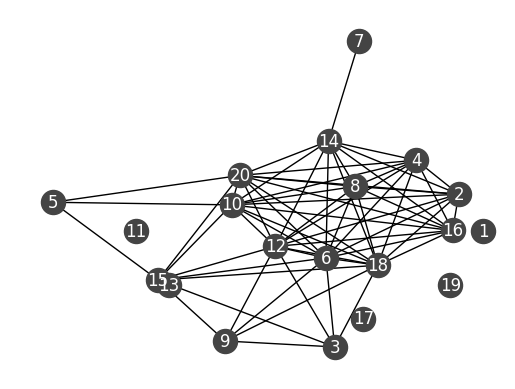

In [4]:
#1
# Define vertices 
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) 

edges = list_edges(1,20)
G.add_edges_from(edges)

basic_graph,ax = plt.subplots(1,1)
# Plot Graph
nx.draw(G,
        ax=ax,
        pos=nx.kamada_kawai_layout(G),
        with_labels=True,
        node_color='#444444',
        font_color="white")

## 2. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

In [5]:
# Max number of edges in a bipartite graph
def maxEdges(V) : 
    edges = (V * V) // 4; 
    return edges; 

max_edges = maxEdges(5)

# Max number of edges in a bipartite graph
def minEdges(V) : 
    edges = (V-1); 
    return edges; 

min_edges = minEdges(5)

print("Greatest number of edges in a connected bipartite graph consisting of 5 nodes: ",max_edges)
print("Least number of edges in a connected bipartite graph consisting of 5 nodes: ",min_edges)


Greatest number of edges in a connected bipartite graph consisting of 5 nodes:  6
Least number of edges in a connected bipartite graph consisting of 5 nodes:  4


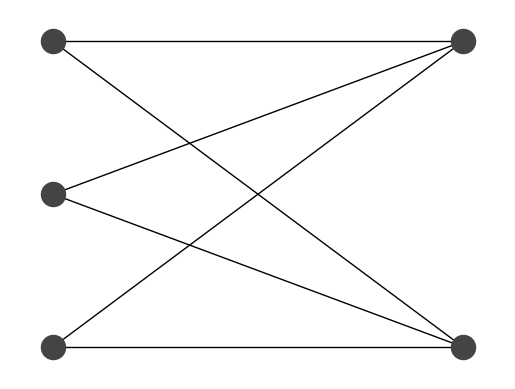

In [6]:
# Graph greatest number of edge bipartite graph with 5 nodes
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,4),(2,4),(3,4),(1,5),(2,5),(3,5)])

V1_nodes = [(1,2,3),(1,2)]
bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[1,2,3]),with_labels=False, node_color='#444444',font_color="white")

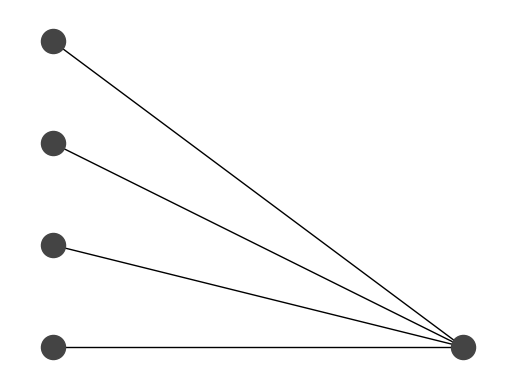

In [7]:
# Graph least number of edge bipartite graph with 5 nodes
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5)])

bipartite_graph,ax = plt.subplots(1,1)
nx.draw(G, ax=ax, pos=nx.bipartite_layout(G,[2,3,4,5]),with_labels=False, node_color='#444444',font_color="white")

## 3. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes.

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$.

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

/Users/enriqueantunano/Documents/institutions/education/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/enriqueantunano/Documents/institutions/education/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


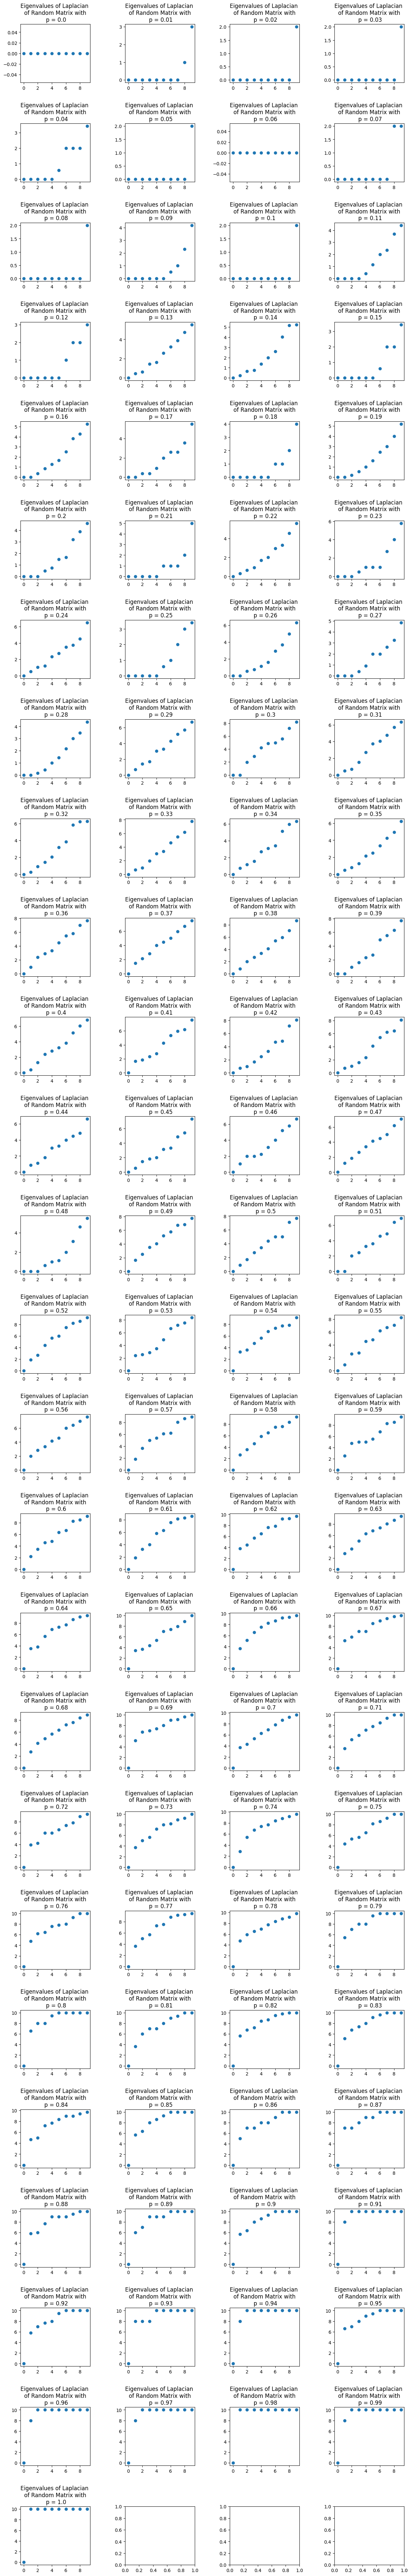

In [8]:
# The networkx library can be used to get the Laplacian of a graph
num_nodes = 10
graphs = []
graph_eigs = []
edge_probs = []
for i in range(0,101):
    edge_prob = i/100
    G = nx.fast_gnp_random_graph(num_nodes,edge_prob)
    L = nx.laplacian_matrix(G).todense()
    eigs = np.linalg.eigvals(L)
    edge_probs.append(edge_prob)
    graphs.append(L)
    graph_eigs.append(eigs)

# setup subplots 10x10
fig, axs = plt.subplots(nrows=26, ncols=4, figsize=(15, 100))
plt.subplots_adjust(wspace=0.5, hspace=0.7)
for i in range(len(graph_eigs)):
    # Plot the graph in the corresponding subplot
    ax = axs[i // 4, i % 4]
    ax.plot(np.sort(graph_eigs[i]),'o')
    ax.set_title(f"Eigenvalues of Laplacian \n of Random Matrix with \n p = {edge_probs[i]}")


Eigenvalues equal to zero indicate the number of connected components in the graph G. When the probability of edge forming is zero, there are 10 distinct components as indicated by all 10 eigenvalues being equal to zero, which is expected since no value has an edge connecting them. At the opposite end of the spectrum, in a completely connected graph it is guaranteed that there's only one componet, as indicated by one eigenvalue equal to zero, since all nodes are connected to every other node. 

Additionaly, in a completely connected graph, the rest of the eigenvalues are equal to ten, the degree of each node. Between an edge probability of 0 and 1, it can be seen that the degrees of each node tends to increase as the probability of an edge forming between nodes increases. This is indicated by the eigenvalues increasing in value from zero as the probability of an edge between nodes increases.

## 4. Hamiltonian Circuits

Consider the set of square grid graphs like those returned by the function `nx.grid_graph(dim=[n,n])` where $n>0$. Show that these graphs always have a Hamilton Circuit when $n$ is even. Use networkx to draw the square grid graph for $n=6$, highlighting a Hamilton cycle.

In [9]:
def route_graph(route):
    """Turns a list into a graph"""
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R

In [10]:
# Construct a random graph to test  HAMILTON CIRCUIT algorithms
n = 6
# This method makes set of dimensions and returns a grid
# graph with those dimensions.
G = nx.grid_graph(dim=[n,n])
print("There are %d nodes" % len(G.nodes))

There are 36 nodes


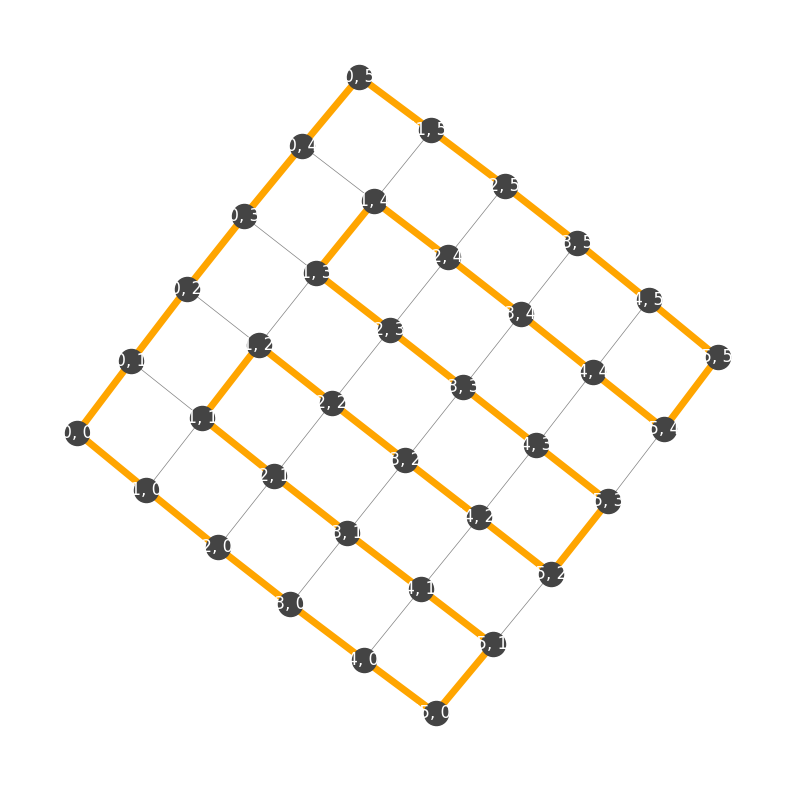

In [11]:
route = ([(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),
          (5,1),(4,1),(3,1),(2,1),(1,1),  
          (1,2),(2,2),(3,2),(4,2),(5,2),
          (5,3),(4,3),(3,3),(2,3),(1,3),
          (1,4),(2,4),(3,4),(4,4),(5,4),
          (5,5),(4,5),(3,5),(2,5),(1,5),
          (0,5),(0,4),(0,3),(0,2),(0,1),(0,0)])

R = route_graph(route)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if R.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if R.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G,
        pos=nx.kamada_kawai_layout(G),
        ax=ax,
        with_labels=True,
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

4. Hamilton Path Eveness Response
Assume that a grid graph is laid out as a chessboard. For any grid point within the grid graph, it is surrounded by the opposite color similar to the checkered pattern of a chess board. Now, we can think of the two color checkered pattern as two distinct sets. If the hamilton path were started at (0,0) and followed the outer perimeter of the grid array, what you would find is that the hamilton path goes from set W, for white squares, to set B, for black squares in the chessboard pattern. If the path continues to follow the pattern presented by the $6x6$ hamilton circuit above, then the trend holds that set W and B are interconnected, but there are no edges between vertices within each set for both sets W and B. From this perspective, the Hamilton Path of a grid graph functions as a bipartite graph.

Now assuming a Hamilton Circuit of a grid array is a bipartite graph, one of the properities of a bipartite graph is that it cannot contain any odd-lenght cycles. An odd-length cycle would require a vertice from the same set to be connected by an edge. If there's a connection within the same set, the graph cannot be treated as a bipartite graph. Following the assumption that a Hamilton Circuit is a bipartite graph, this means that $n$ must be even or it will fail to be a bipartite graph.

## 5. The Page Rank Algorithm

For the following problem, use the `networkx` `pagerank` function or find the eigenvector of the graph as a Markov Process corresponding to the eigenvector 1. Use undirected graphs.

a) Find a 10 node, connected graph in which all nodes are ranked equally or explain why such a graph does not exist.

b) Find a 10 node, connected graph in which all nodes are ranked differently or explain why such a graph does not exist.

c) Find a 10 node, connected graph in which there are two sets $A$ and $B$ of $5$ nodes for which all nodes in $A$ are ranked the same and all nodes in $B$ are ranked the same, but different from nodes in $A$. Or explain why such a graph does not exist.

Response
a) For an undirected graph, a k-regular connected graph will result in all nodes being ranked equally. In my example, I have a 9-regular graph, or a complete graph, so the pagerank is equal for nodes. <br>

In [12]:
def page_rank(G):
    """Returns a dictionary of nodes with PageRank as the value for all nodes in graph G."""
    T = nx.pagerank(G,max_iter=50000)

    return T

Connected: yes


{0: 0.1, 1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.1, 7: 0.1, 8: 0.1, 9: 0.1}

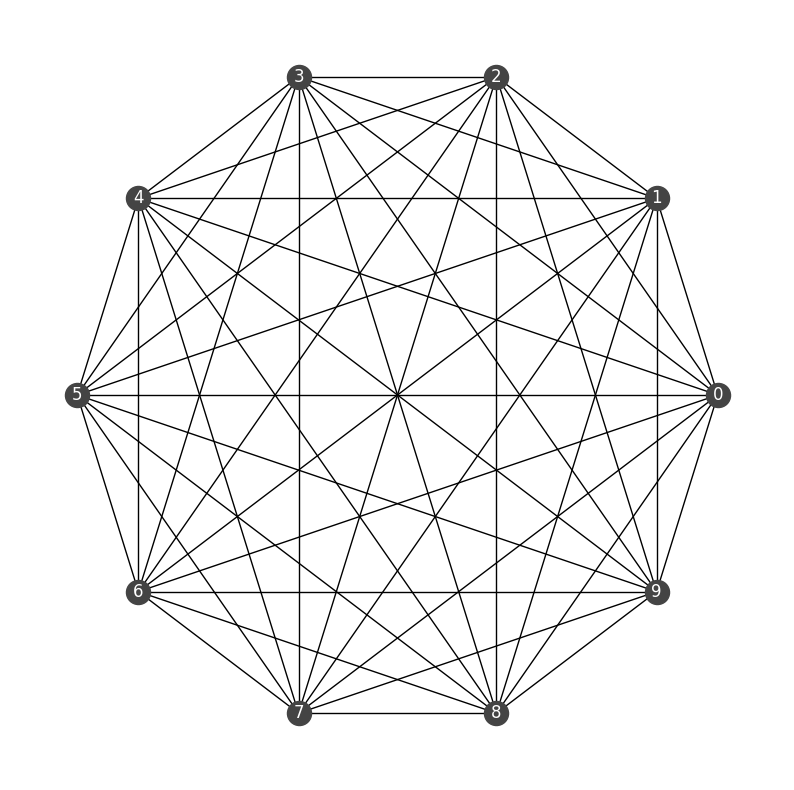

In [13]:
# This method makes a random graph with 10 nodes and a probability of 0.5 for
# whether to connect any given pair of nodes with an edge.
G = nx.fast_gnp_random_graph(10,1)
print("Connected: %s" % ("yes" if nx.is_connected(G) else "no"))

# Call the PageRank graph.
T = page_rank(G)

# Make a figure to show the results.
fig,ax = plt.subplots(1,1,figsize=(10,10))

# The draw function from the networkx library.
nx.draw(G,
        pos=nx.kamada_kawai_layout(G),
        ax=ax,
        with_labels=True,
        node_color='#444444',
        font_color="white")

T

b) It is not possible to have a 10 node connected graph in which all nodes are ranked differently. Assume that each node had a unique rank. this would mean that the degree of each node is also unique. If all ten nodes were to have a unique degree, then assume that node 0 has a degree of 0, node 1 has a degree of 1, ... , node 9 has a degree of 9. It is true that each node has a unique rank, but since node 0 has a degree of zero this means that node 0 is isolated. An isolated node would indicate a two component graph rather than a single 10 node connected graph. Conversely, the only way to have a connected 10 node graph is if one node has the same degree as another node in the set. <br>

Finally, node 10 requires 9 edges. In a ten node undirected graph, this would require an edge to node 0. This would mean that node 0 cannot have a degree of zero (0), but instead a degree of one (1) minimum. The same dilemma would occur for every other node in the set. Meaning that one node must have a repeat degree value.

c) For an undirected graph, assume set A is k-regular and set B is l-regular. In my example, set A was 6-regular while set B was 3-regular. If all the nodes in sets A and B respectively are regualar, then it can be guranteed that the nodes have the same PageRank value. Now, to show that sets A and B form a 10 node connected graph, assume for set A that k-1 degrees connect to other nodes in set A, leaving only one edge to connect to a unique node in set B for each node in set A. Do the same for set B, have l-1 degrees connect to other nodes in set B, leaving only one edge to connect to a unique node in set A for each node in set B. Now take the page rank for all the nodes in the 10 node connected graph. Nodes 0-4 represent set A and nodes 5-9 represent set B in my example. You can see all the respecive nodes sets A and B have the same page rank and how the two sets are connected in the graph. <br>

Connected: yes


{0: 0.11878424534476285, 1: 0.11878424534476285, 2: 0.11878424534476285, 3: 0. ↪

↪ 11878424534476285, 4: 0.11878424534476285, 5: 0.08121575465523712, 6: 0.0812 ↪

↪ 1575465523712, 7: 0.08121575465523712, 8: 0.08121575465523712, 9: 0.08121575 ↪

↪ 465523712}

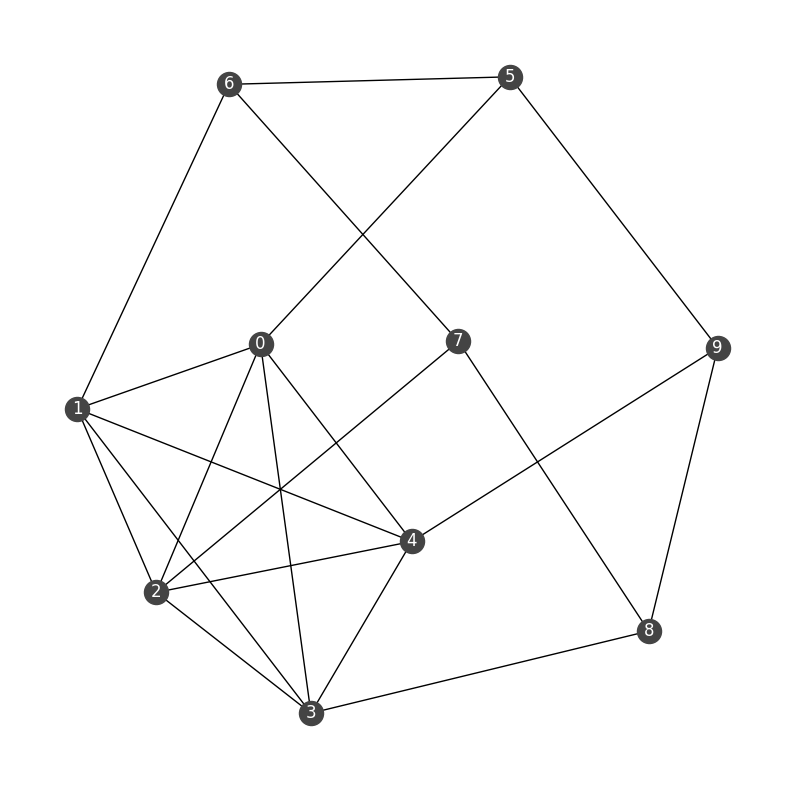

In [14]:
G = nx.fast_gnp_random_graph(5,1)
G.add_nodes_from([5,6,7,8,9])
G.add_edges_from([(5,0),(5,9),(5,6),
                  (6,1),(6,5),(6,7),
                  (7,2),(7,6),(7,8),
                  (8,3),(8,7),(8,9),
                  (9,4),(9,8),(9,5)])
print("Connected: %s" % ("yes" if nx.is_connected(G) else "no"))

# Call the PageRank graph.
T = page_rank(G)

# Make a figure to show the results.
fig,ax = plt.subplots(1,1,figsize=(10,10))

# The draw function from the networkx library.
nx.draw(G,
        pos=nx.kamada_kawai_layout(G),
        ax=ax,
        with_labels=True,
        node_color='#444444',
        font_color="white")

T